## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Data Visualization and Analysis

## Load Dataset

In [2]:
data = pd.read_csv("./DataSets/heart.csv")
y=data.output
X=data.copy()
X.drop(['output'],axis=1,inplace=True)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Information of Data

In [3]:
data.info()
print("*"*100)
categorical_cols=[cols for cols in X.columns if X[cols].nunique() <10 ]
print("Categorical features of our dataset : ",categorical_cols)
print("\n")
numeric_cols=[cols for cols in X.columns if X[cols].nunique() >10 ]
print("Numerical features of our dataset : ",numeric_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
****************************************************************************************************
Categorical features of our dataset :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']


Numerical feat

### Observation :
- Total 303 entries

- Total 14 columns or features , among them 1 feature is our target(output)

- There are no null value in our dataset

- ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'] is our categorical features

- ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'] is our numerical features

## Target Analysis

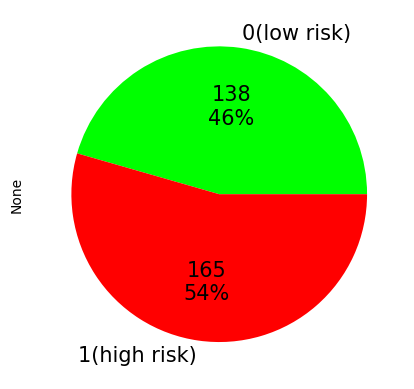

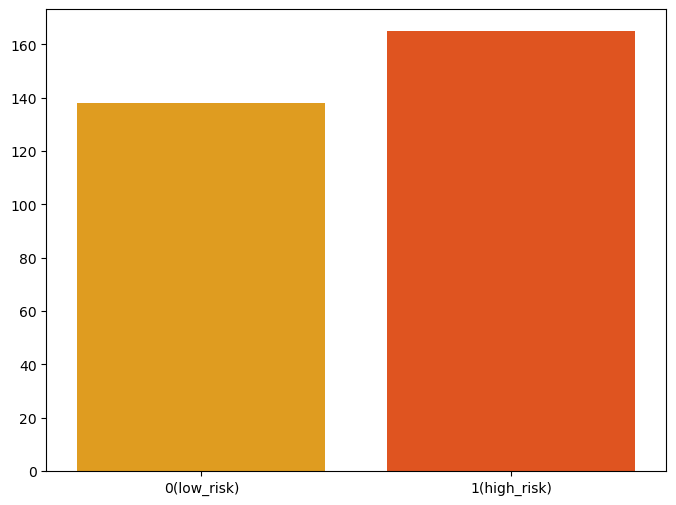

In [4]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
labels = ["0(low risk)","1(high risk)"]
data.groupby('output').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15}, colors=['#00FF00','#FF0000'],labels=labels)
#plt.legend()
plt.show()
#print("*"*80)


counts = data["output"].value_counts().sort_values()

diag_cols = ["0(low_risk)", "1(high_risk)"]

diag_counts = [counts[0], counts[1]]

plt.figure(figsize = (8, 6))
clrs = ['#FFA500' if (x < max(diag_counts)) else '#FF4500' for x in diag_counts ]
sns.barplot(x = diag_cols, y = diag_counts, palette=clrs)
plt.show()

### Observation :
look at the pie chart and barplot :

- 54% people are in risk zone that means have a chance of heart attack

- 46% people are in low risk zone that means have a less chance of heart attack

- total people 303 , among them 165 people have a more chance in heart attack another 138 people have less chance.

## Features Analysis

In [5]:
print (data[["sex", "output"]].groupby(['sex'], as_index=False).mean())

   sex    output
0    0  0.750000
1    1  0.449275


In [6]:
print (data[["cp", "output"]].groupby(['cp'], as_index=False).mean())

   cp    output
0   0  0.272727
1   1  0.820000
2   2  0.793103
3   3  0.695652


In [7]:
print (data[["fbs", "output"]].groupby(['fbs'], as_index=False).mean())

   fbs    output
0    0  0.550388
1    1  0.511111


In [8]:
print (data[["restecg", "output"]].groupby(['restecg'], as_index=False).mean())

   restecg    output
0        0  0.462585
1        1  0.631579
2        2  0.250000


In [9]:
print (data[["exng", "output"]].groupby(['exng'], as_index=False).mean())

   exng    output
0     0  0.696078
1     1  0.232323


In [10]:
print (data[["slp", "output"]].groupby(['slp'], as_index=False).mean())

   slp    output
0    0  0.428571
1    1  0.350000
2    2  0.753521


In [11]:
print (data[["caa", "output"]].groupby(['caa'], as_index=False).mean())

   caa    output
0    0  0.742857
1    1  0.323077
2    2  0.184211
3    3  0.150000
4    4  0.800000


In [12]:
print (data[["thall", "output"]].groupby(['thall'], as_index=False).mean())

   thall    output
0      0  0.500000
1      1  0.333333
2      2  0.783133
3      3  0.239316


In [13]:
data['cat_age'] = pd.cut(data['age'], 5)
print (data[["cat_age", "output"]].groupby(['cat_age'], as_index=False).mean())

          cat_age    output
0  (28.952, 38.6]  0.750000
1    (38.6, 48.2]  0.704225
2    (48.2, 57.8]  0.577320
3    (57.8, 67.4]  0.377358
4    (67.4, 77.0]  0.588235


In [14]:
data['cat_trtbps'] = pd.cut(data['trtbps'], 5)
print (data[["cat_trtbps", "output"]].groupby(['cat_trtbps'], as_index=False).mean())

        cat_trtbps    output
0  (93.894, 115.2]  0.615385
1   (115.2, 136.4]  0.560284
2   (136.4, 157.6]  0.535714
3   (157.6, 178.8]  0.380952
4   (178.8, 200.0]  0.200000


In [15]:
data['cat_thalachh'] = pd.cut(data['thalachh'], 5)
print (data[["cat_thalachh", "output"]].groupby(['cat_thalachh'], as_index=False).mean())

     cat_thalachh    output
0  (70.869, 97.2]  0.142857
1   (97.2, 123.4]  0.297297
2  (123.4, 149.6]  0.352273
3  (149.6, 175.8]  0.678571
4  (175.8, 202.0]  0.870968


In [16]:
data['cat_chol'] = pd.cut(data['chol'], 5)
print (data[["cat_chol", "output"]].groupby(['cat_chol'], as_index=False).mean())

           cat_chol    output
0  (125.562, 213.6]  0.611765
1    (213.6, 301.2]  0.514286
2    (301.2, 388.8]  0.526316
3    (388.8, 476.4]  0.500000
4    (476.4, 564.0]  1.000000


In [17]:
x=[data]
for dataset in x:
    dataset['exng_fbs'] = dataset['fbs'] + dataset['exng'] 
data[['exng_fbs','output']].groupby(['exng_fbs'], as_index=False).mean().sort_values(by='output',ascending=False)

,exng_fbs,output
0,0,0.691429
1,1,0.375000
2,2,0.125000


## Categorical and Numerical Features Analysis

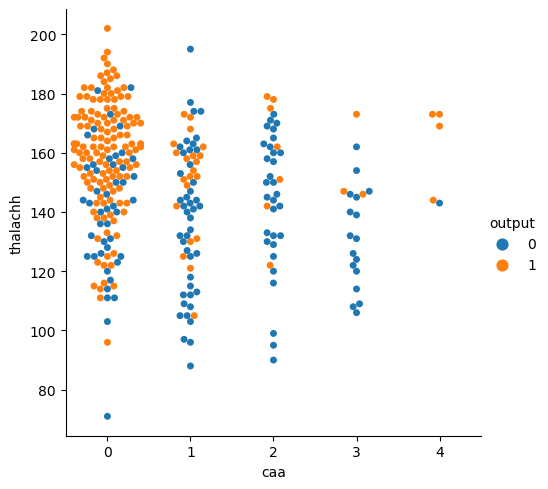

In [18]:
sns.catplot(x="caa", y="thalachh", hue="output", kind="swarm", data=data)

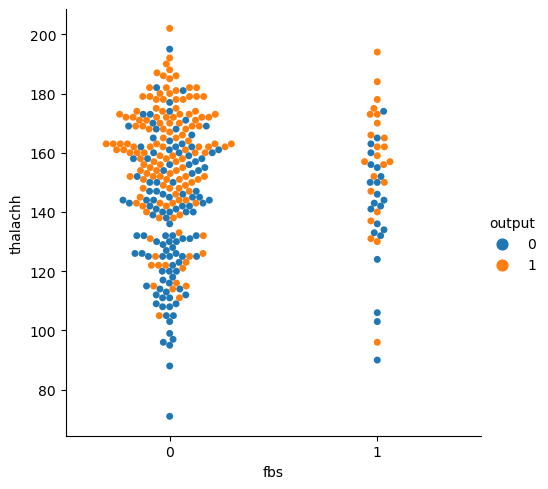

In [19]:
sns.catplot(x="fbs", y="thalachh", hue="output", kind="swarm", data=data)

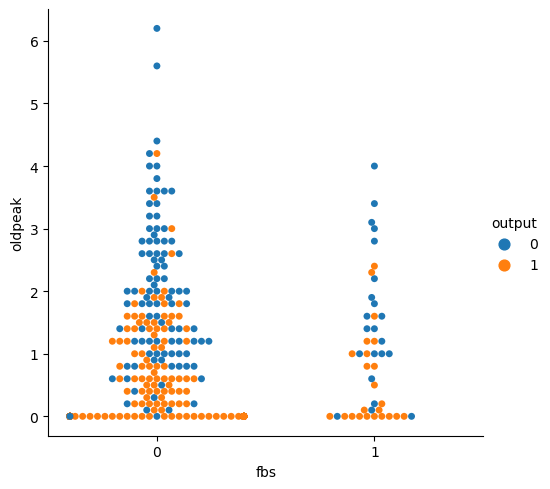

In [20]:
sns.catplot(x="fbs", y="oldpeak", hue="output", kind="swarm", data=data)

### Observation :

- People who have high thalachh rate, are more chance to heart attack.

- People who have less oldpeak, are more chance to heart attack.

## Correlation

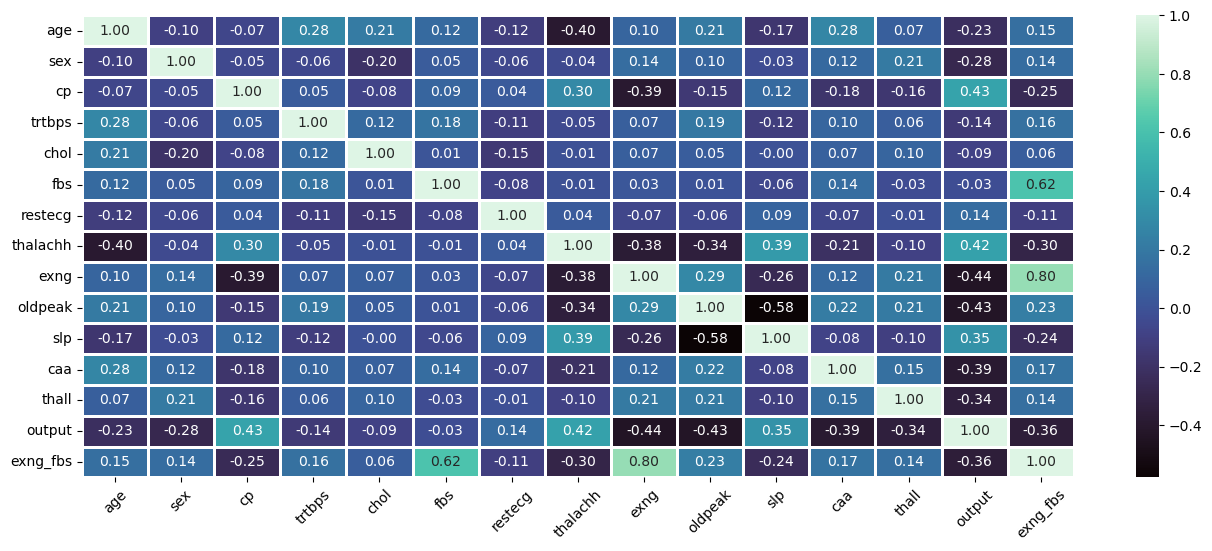

In [21]:

plt.figure(figsize=(16, 6))
heat_map = sns.heatmap( data.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2, cmap='mako')
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45); # correlations between the features


## Detect Outliers

### Find z-score

In [22]:
z = np.abs(stats.zscore(X[numeric_cols]))
threshold = 3
print(np.where(z >=threshold))


<IPython.core.display.Javascript object>

(array([ 28,  85, 204, 220, 221, 223, 246, 248, 272], dtype=int64), array([2, 2, 4, 2, 4, 1, 2, 1, 3], dtype=int64))


## Boxplot

<AxesSubplot:xlabel='oldpeak'>

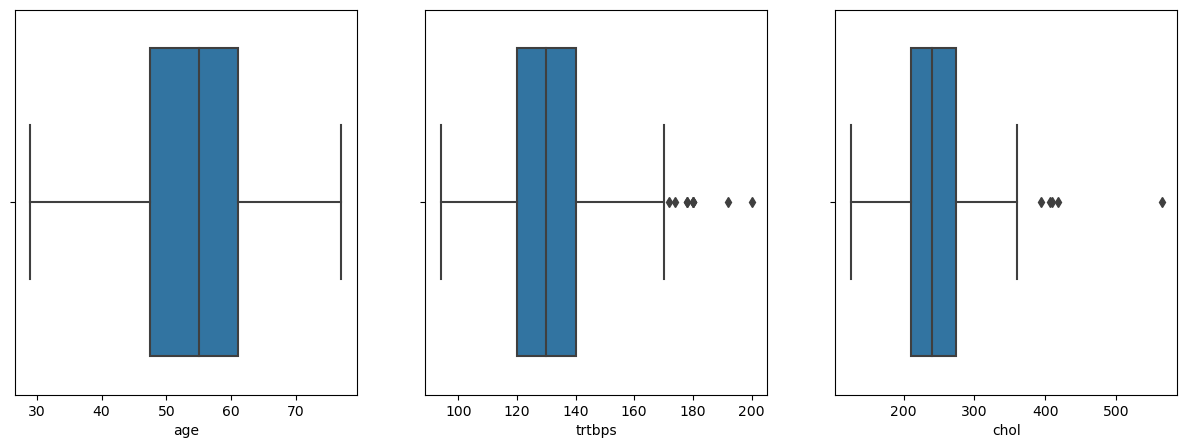

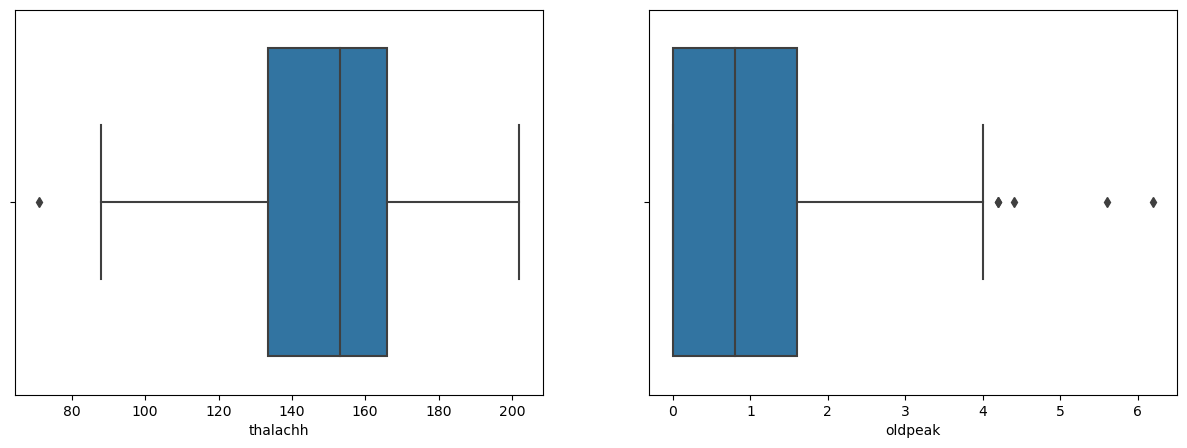

In [23]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(x=X["age"],ax=axis1)
sns.boxplot(x=X["trtbps"],ax=axis2)
sns.boxplot(x=X["chol"],ax=axis3)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x=X["thalachh"],ax=axis1)
sns.boxplot(x=X["oldpeak"],ax=axis2)

### Observation :

- Age feature don't have any outliers

- All others numeric features contains outliers

# Apply Machine Learning Model

## Data Preprocessing

In [24]:
seed(2)
features_num = ["age","trtbps","chol","thalachh","oldpeak"]

features_cat = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
random_state=2

transformer_num = make_pipeline(
    StandardScaler(),
)
transformer_cat = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

X_train, X_valid, y_train, y_valid =train_test_split(X, y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

### Logistic Regression

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred = logreg.predict(X_valid)
print("test accuracy score of  Logistic Regression = ", accuracy_score(y_valid, pred)*100)
a_log = round(accuracy_score(y_valid, pred) * 100, 2)


test accuracy score of  Logistic Regression =  93.42105263157895


### Support Vector Machine

In [26]:
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_valid)
print("test accuracy score of Support Vector Machine = ", accuracy_score(y_valid, pred)*100)
a_svc = round(accuracy_score(y_valid, pred) * 100, 2)

test accuracy score of Support Vector Machine =  90.78947368421053


### Stochastic Gradient Descent

In [27]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred = sgd.predict(X_valid)
print("test accuracy score of Stochastic Gradient Descentt = ", accuracy_score(y_valid, pred)*100)
a_sgd = round(accuracy_score(y_valid, pred) * 100, 2)

test accuracy score of Stochastic Gradient Descentt =  82.89473684210526


### Decision Tree Classifier

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_valid)
print("test accuracy score of Decision Tree = ", accuracy_score(y_valid, pred)*100)
a_decision_tree = round(accuracy_score(y_valid, pred) * 100, 2)

test accuracy score of Decision Tree =  81.57894736842105


### RandomForestClassifier

In [29]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_valid)
random_forest.score(X_train, y_train)
print("test accuracy score of Random Forest = ", accuracy_score(y_valid, pred)*100)
a_random_forest = round(accuracy_score(y_valid, pred) * 100,2)

test accuracy score of Random Forest =  86.8421052631579


### Linear SVC

In [30]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
pred = linear_svc.predict(X_valid)
print("test accuracy score of  Linear SVC = ", accuracy_score(y_valid, pred)*100)
a_linear_svc= round(accuracy_score(y_valid, pred) * 100, 2)

test accuracy score of  Linear SVC =  90.78947368421053


### KNN

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_valid)
print("test accuracy score of KNN = ", accuracy_score(y_valid, pred)*100)
a_knn = round(accuracy_score(y_valid, pred) * 100, 2)

test accuracy score of KNN =  85.52631578947368


### Gaussian Naive Bayes

In [32]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred = gaussian.predict(X_valid)
print("test accuracy score of Gaussian Naive Bayes = ", accuracy_score(y_valid, pred)*100)
a_gaussian = round(accuracy_score(y_valid, pred)* 100, 2)

test accuracy score of Gaussian Naive Bayes =  77.63157894736842


# Compare All Model Score

,model,score
1,Logistic Regression,93.42
4,Linear SVC,90.79
5,Support Vector Machines,90.79
3,Random Forest,86.84
0,KNN,85.53
6,Stochastic Gradient Decent,82.89
7,Decision Tree,81.58
2,Gaussian Naive Bayes,77.63


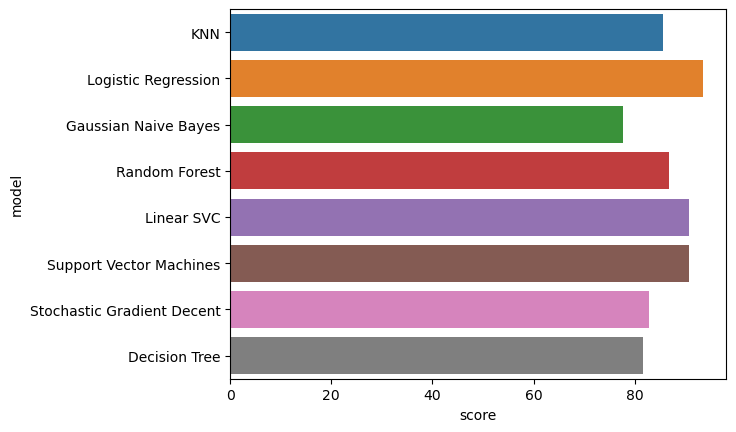

In [33]:
models = pd.DataFrame({
    'model': ['KNN','Logistic Regression', 
               'Gaussian Naive Bayes','Random Forest','Linear SVC', 
              'Support Vector Machines','Stochastic Gradient Decent','Decision Tree'],
    'score': [a_knn, a_log,  a_gaussian,
              a_random_forest, a_linear_svc, 
              a_svc, a_sgd, a_decision_tree]})

sns.barplot(x='score', y='model', data=models)

models.sort_values(by='score', ascending=False)